<a href="https://colab.research.google.com/github/varuny09/customer-churn-pridiction-/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Import Libraries**

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


** Load the Dataset**

In [3]:
 import pandas as pd

# Load the dataset
file_path = '/content/Telco_customer_churn.xlsx'
data = pd.read_excel(file_path)

# Preview the dataset
print(data.head())
print(data.info())


   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Tota

Convert Total Charges to numeric, handling errors

In [5]:
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')
data

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.50,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.90,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


Handle missing values

In [7]:
data.fillna({'Churn Reason': 'Unknown'}, inplace=True)  # Replace missing churn reasons with 'Unknown'
data.dropna(inplace=True)
data

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0,45,5306,Unknown
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.50,No,0,59,2140,Unknown
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.90,No,0,71,5560,Unknown
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,Unknown


In [8]:
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
        Count      Zip Code     Latitude    Longitude  Tenure Months  \
count  7032.0   7032.000000  7032.000000  7032.000000    7032.000000   
mean      1.0  93523.032565    36.283307  -119.799215      32.421786   
std       0.0   1865.515958     2.456118     2.157588      24.545260   
min       1.0  90001.000000    32.555828  -124.301372       1.000000   
25%       1.0  92102.000000    34.030915  -121.815412       9.000000   
50%       1.0  93552.500000    36.391777  -119.735410      29.000000   
75%       1.0  95354.000000    38.227285  -118.043237      55.000000   
max       1.0  96161.000000    41.962127  -114.192901      72.000000   

       Monthly Charges  Total Charges  Churn Value  Churn Score         CLTV  
count      7032.000000    7032.000000  7032.000000  7032.000000  7032.000000  
mean         64.798208    2283.300441     0.265785    58.715301  4401.445108  
std          30.085974    2266.771362     0.441782    21.531321  1182.414266  
min          18

In [9]:
print("\nChurn Label Distribution:")
print(data['Churn Label'].value_counts())


Churn Label Distribution:
Churn Label
No     5163
Yes    1869
Name: count, dtype: int64


Visualize the distribution of churn vs. non-churn

<ipython-input-10-7afe58405b01>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Churn Label', palette='viridis')


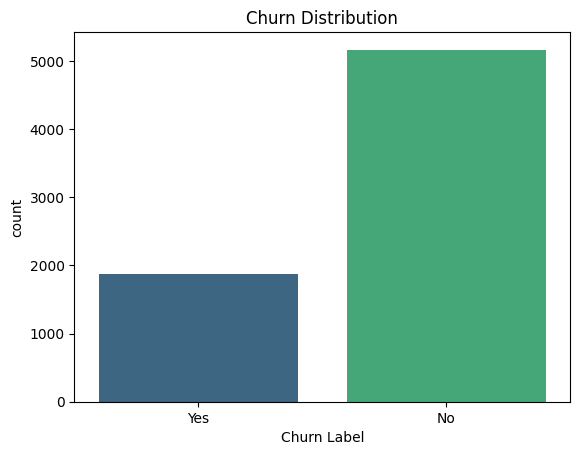

In [10]:
sns.countplot(data=data, x='Churn Label', palette='viridis')
plt.title('Churn Distribution')
plt.show()

Numerical feature distributions

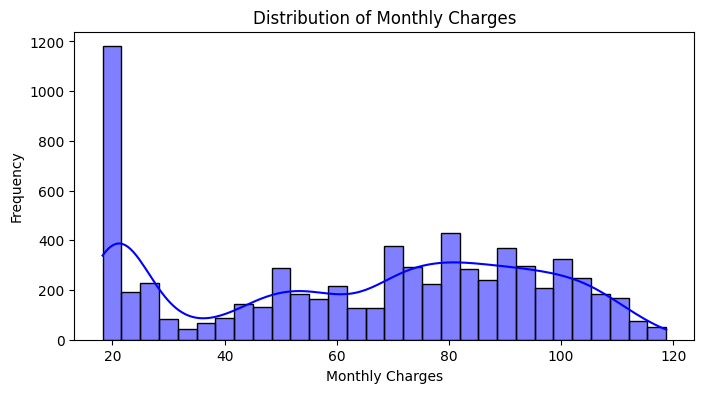

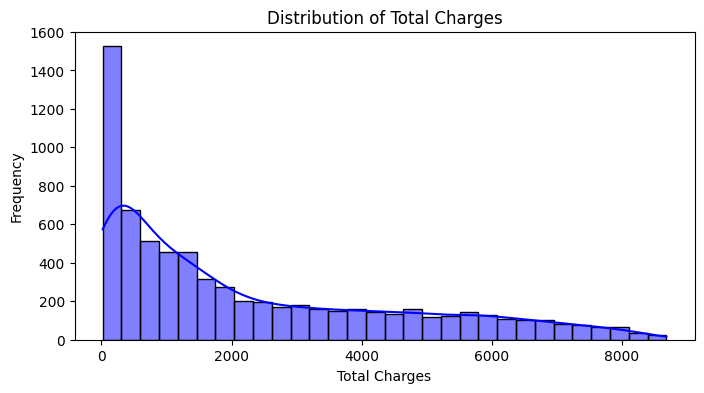

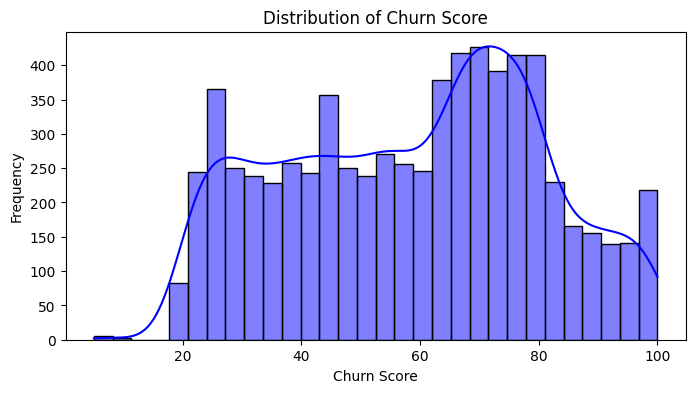

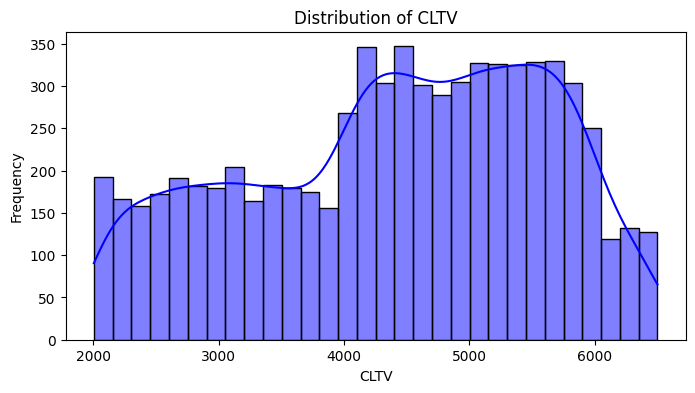

In [12]:
numerical_features = ['Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

Categorical feature relationships with churn

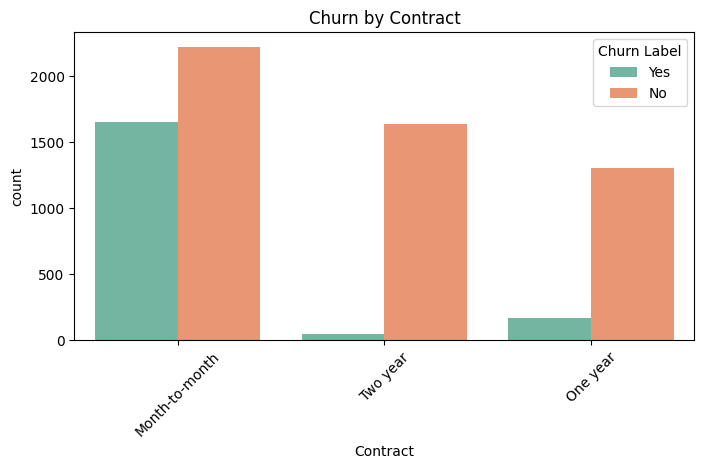

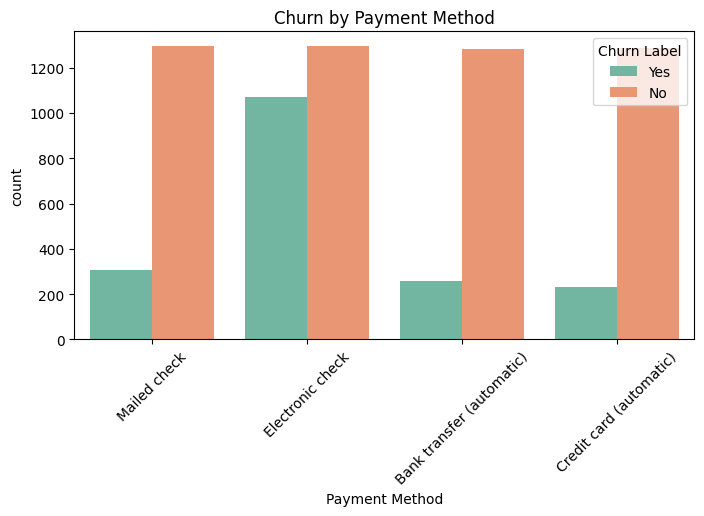

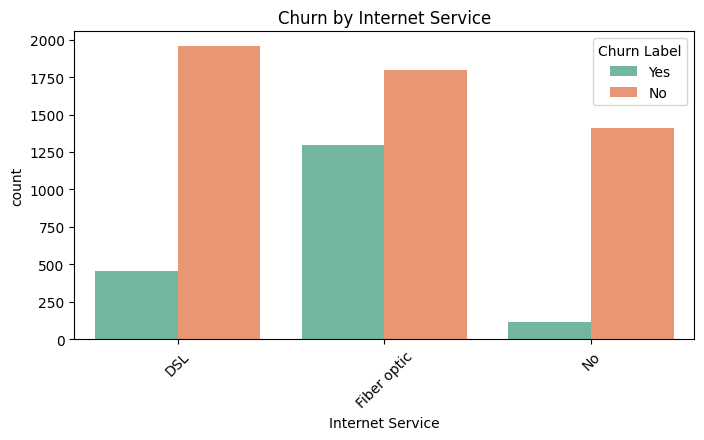

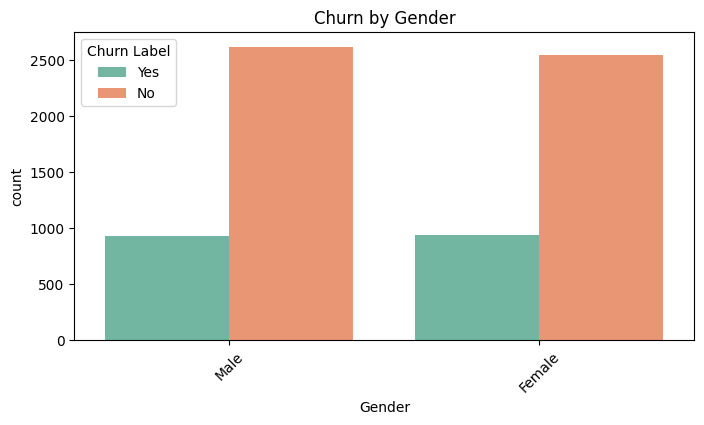

In [13]:
categorical_features = ['Contract', 'Payment Method', 'Internet Service', 'Gender']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=feature, hue='Churn Label', palette='Set2')
    plt.title(f'Churn by {feature}')
    plt.xticks(rotation=45)
    plt.show()


<ipython-input-15-cfe710e8008d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn Label', y='Monthly Charges', palette='muted')


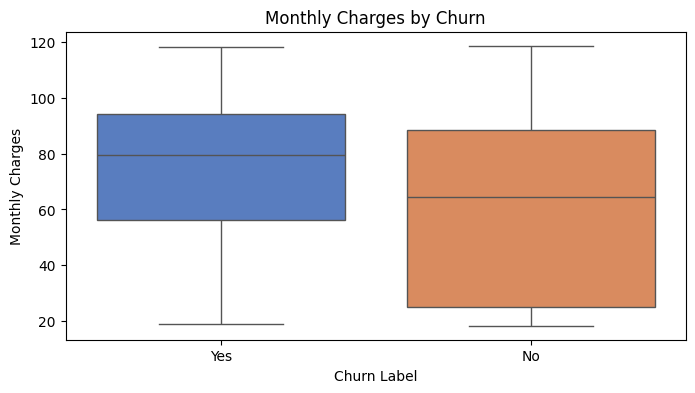

In [15]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=data, x='Churn Label', y='Monthly Charges', palette='muted')
plt.title('Monthly Charges by Churn')
plt.show()

In [24]:
# Example Python code using RandomForestClassifier

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Data Preprocessing (Assuming df is your dataset)
# You will encode categorical variables and scale numerical ones.

# Assuming the 'Churn Label' is the target variable
X = df.drop(columns=['Churn Label', 'CustomerID'])
y = df['Churn Label']

# Preprocessing pipeline for numeric and categorical columns
numeric_features = ['Monthly Charges', 'Total Charges']  # Example of numeric features
categorical_features = ['Gender', 'Contract', 'Payment Method']  # Example of categorical features

# Define transformers for different types of data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 2: Build Model Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Step 3: Split Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Model
model.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

          No       0.82      0.87      0.85      1012
         Yes       0.61      0.52      0.57       395

    accuracy                           0.77      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.77      0.77      1407

[[882 130]
 [188 207]]


In [25]:
label_encoder = LabelEncoder()

# Fit and transform the training labels and transform the test labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Get the predicted probabilities for the positive class (class "Yes" -> encoded as 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the "Yes" class

# Calculate the ROC AUC score using the probabilities
roc_auc = roc_auc_score(y_test_encoded, y_pred_proba)
print(f'ROC AUC: {roc_auc}')


ROC AUC: 0.8137964677040076
